In [107]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\yadhu\Downloads\Football.csv')


In [108]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2010-01-02,Qatar,Mali,0,0,Friendly,Doha,Qatar,False
1,2010-01-02,Yemen,Tajikistan,0,1,Friendly,Sana'a,Yemen,False
2,2010-01-04,Tanzania,Ivory Coast,0,1,Friendly,Dar es Salaam,Tanzania,False
3,2010-01-06,Bahrain,Hong Kong,4,0,AFC Asian Cup qualification,Riffa,Bahrain,False
4,2010-01-06,Benin,Libya,1,0,Friendly,Cotonou,Benin,False


In [109]:
df[df.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [110]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

date - 0%
home_team - 0%
away_team - 0%
home_score - 0%
away_score - 0%
tournament - 0%
city - 0%
country - 0%
neutral - 0%


In [111]:
nan_df = df[df.isna().any(axis = 1)]
nan_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


<AxesSubplot:>

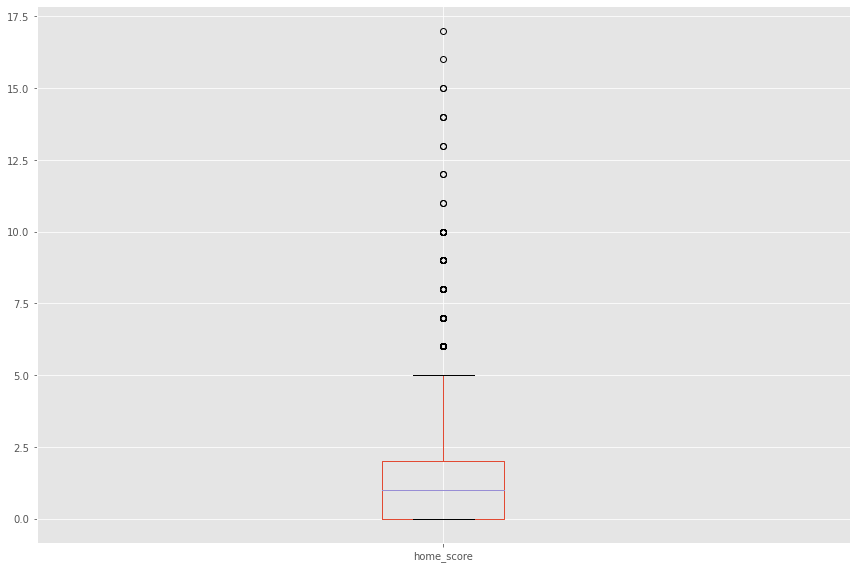

In [112]:
# Are there any Outliers?

df.boxplot(column=['home_score'])

In [113]:
print(df['home_score'].min())
print(df['home_score'].max())

0
17


<AxesSubplot:>

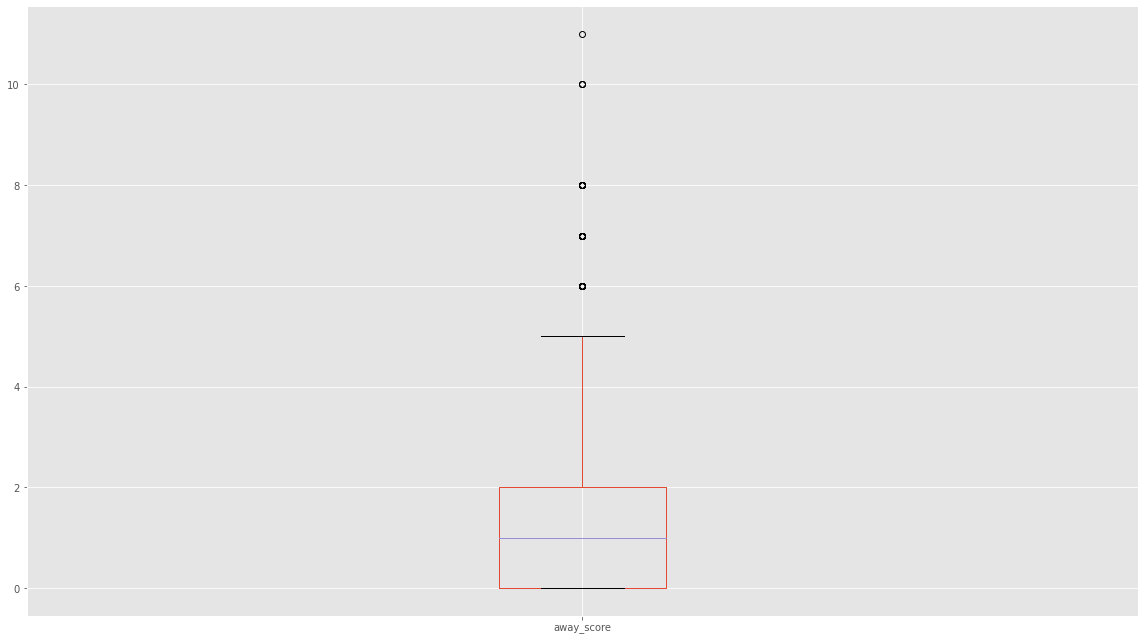

In [96]:
# Are there any Outliers?

df.boxplot(column=['away_score'])3e

In [114]:
print(df['away_score'].min())
print(df['away_score'].max())

0
11


In [116]:
#df = df[df['home_score']!=df['away_score']]
#df.columns

df = df[df.away_team.isin(df['home_team'].unique())]
df = df[df.home_team.isin(df['away_team'].unique())]

In [117]:
df['home_win'] = np.where((df['home_score'] > df['away_score']), 'Yes', 'No')
df['away_win'] = np.where((df['home_score'] < df['away_score']), 'Yes', 'No')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
0,2010-01-02,Qatar,Mali,0,0,Friendly,Doha,Qatar,False,No,No
1,2010-01-02,Yemen,Tajikistan,0,1,Friendly,Sana'a,Yemen,False,No,Yes
2,2010-01-04,Tanzania,Ivory Coast,0,1,Friendly,Dar es Salaam,Tanzania,False,No,Yes
3,2010-01-06,Bahrain,Hong Kong,4,0,AFC Asian Cup qualification,Riffa,Bahrain,False,Yes,No
4,2010-01-06,Benin,Libya,1,0,Friendly,Cotonou,Benin,False,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
8068,2022-03-29,Uzbekistan,Uganda,4,2,Navruz Cup,Namangan,Uzbekistan,False,Yes,No
8069,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False,Yes,No
8070,2022-03-30,Costa Rica,United States,2,0,FIFA World Cup qualification,San José,Costa Rica,False,Yes,No
8071,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False,Yes,No


In [118]:
#How many times the home team won
df['home_win'].value_counts()

Yes    4022
No     3950
Name: home_win, dtype: int64

In [119]:
#How many times the away team won
df['away_win'].value_counts()

No     5864
Yes    2108
Name: away_win, dtype: int64

In [120]:
df['home_team'].nunique() 

224

In [121]:
df['away_team'].nunique() 

224

In [122]:
df[~df.away_team.isin(df['home_team'].unique())]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win


In [123]:
#grouping by home team and then by home win
gb = df.groupby(['home_team','home_win'])

gb.get_group(('Croatia','Yes'))



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
110,2010-05-23,Croatia,Wales,2,0,Friendly,Osijek,Croatia,False,Yes,No
415,2010-10-12,Croatia,Norway,2,1,Friendly,Zagreb,Croatia,False,Yes,No
481,2010-11-17,Croatia,Malta,3,0,UEFA Euro qualification,Zagreb,Croatia,False,Yes,No
576,2011-02-09,Croatia,Czech Republic,4,2,Friendly,Pula,Croatia,False,Yes,No
735,2011-06-03,Croatia,Georgia,2,1,UEFA Euro qualification,Split,Croatia,False,Yes,No
1041,2011-09-06,Croatia,Israel,3,1,UEFA Euro qualification,Zagreb,Croatia,False,Yes,No
1170,2011-10-11,Croatia,Latvia,2,0,UEFA Euro qualification,Rijeka,Croatia,False,Yes,No
1485,2012-05-25,Croatia,Estonia,3,1,Friendly,Rijeka,Croatia,False,Yes,No
1724,2012-09-07,Croatia,North Macedonia,1,0,FIFA World Cup qualification,Zagreb,Croatia,False,Yes,No
1894,2012-10-16,Croatia,Wales,2,0,FIFA World Cup qualification,Osijek,Croatia,False,Yes,No


In [124]:
#counting if the home team won the game or not

new = gb.home_win.count()

#converting the series into a dataframe for further analysis

new = pd.DataFrame(new)

#Renaming the column to a different name than the index
new.rename(columns = {'home_win':'count'},inplace=True)


#Resetting the indexes so we get the required columns
new = new.reset_index()

#creating a pivot table for ease of calculating 
new = new.pivot(index = 'home_win',columns='home_team').fillna(0)

#Creating a new row for Win percentage

new.loc['home_win%'] = new.apply(lambda x: (x["Yes"] / (x["Yes"]+x["No"])*100))

#converting the multi index column to a single index

new.columns = new.columns.droplevel(0)

#Transposing the dataframe
new = new.transpose()

#Creating a new total games played column
new['Total'] = new['No'] + new['Yes']

#creating a new dataframe with teams that have played atleast 50 games
new_filtered = new[new['Total'] >= 50]

#reseting index so that the team becomes a column
new_filtered = new_filtered.reset_index()

#Sorting by win percentage
#new_filtered.sort_values(by = 'Home_Win(%)',ascending=False)


new_filtered

home_win,home_team,No,Yes,home_win%,Total
0,Albania,30.0,25.0,45.454545,55.0
1,Algeria,14.0,37.0,72.549020,51.0
2,Austria,33.0,35.0,51.470588,68.0
3,Bahrain,39.0,34.0,46.575342,73.0
4,Belgium,21.0,46.0,68.656716,67.0
5,Brazil,12.0,47.0,79.661017,59.0
6,Chile,16.0,36.0,69.230769,52.0
7,China PR,36.0,38.0,51.351351,74.0
8,Croatia,15.0,39.0,72.222222,54.0
9,Czech Republic,26.0,27.0,50.943396,53.0


In [125]:
#grouping by away team and then by away win
gb2 = df.groupby(['away_team','away_win'])
gb2.get_group(('Croatia','No'))

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
123,2010-05-26,Estonia,Croatia,0,0,Friendly,Tallinn,Estonia,False,No,No
217,2010-08-11,Slovakia,Croatia,1,1,Friendly,Bratislava,Slovakia,False,No,No
642,2011-03-26,Georgia,Croatia,1,0,UEFA Euro qualification,Tbilisi,Georgia,False,Yes,No
679,2011-03-29,France,Croatia,0,0,Friendly,Saint-Denis,France,False,No,No
909,2011-08-10,Republic of Ireland,Croatia,0,0,Friendly,Dublin,Republic of Ireland,False,No,No
1119,2011-10-07,Greece,Croatia,2,0,UEFA Euro qualification,Piraeus,Greece,False,Yes,No
1533,2012-06-02,Norway,Croatia,1,1,Friendly,Oslo,Norway,False,No,No
1778,2012-09-11,Belgium,Croatia,1,1,FIFA World Cup qualification,Brussels,Belgium,False,No,No
2525,2013-09-06,Serbia,Croatia,1,1,FIFA World Cup qualification,Belgrade,Serbia,False,No,No
2676,2013-10-15,Scotland,Croatia,2,0,FIFA World Cup qualification,Glasgow,Scotland,False,Yes,No


In [126]:

#counting if the home team won the game or not

new2 = gb2.away_win.count()

#converting the series into a dataframe for further analysis

new2 = pd.DataFrame(new2)

#Renaming the column to a different name than the index
new2.rename(columns = {'away_win':'count'},inplace=True)


#Resetting the indexes so we get the required columns
new2 = new2.reset_index()

#creating a pivot table for ease of calculating 
new2 = new2.pivot(index = 'away_win',columns='away_team').fillna(0)

#Creating a new row for Win percentage

new2.loc['away_win%'] = new2.apply(lambda x: (x["Yes"] / (x["Yes"]+x["No"])*100))

#converting the multi index column to a single index

new2.columns = new2.columns.droplevel(0)

#Transposing the dataframe
new2 = new2.transpose()

#Creating a new total games played column
new2['Total'] = new2['No'] + new2['Yes']

#creating a new dataframe with teams that have played atleast 50 games
new2_filtered = new2[new2['Total'] >= 50]

#reseting index so that the team becomes a column
new2_filtered = new2_filtered.reset_index()

#new2_filtered

#Sorting by win percentage
#new2_filtered.sort_values(by = 'Away_Win(%)',ascending=False)

new2_filtered

away_win,away_team,No,Yes,away_win%,Total
0,Albania,35.0,16.0,31.372549,51.0
1,Argentina,27.0,25.0,48.076923,52.0
2,Australia,32.0,19.0,37.254902,51.0
3,Azerbaijan,41.0,10.0,19.607843,51.0
4,Belarus,42.0,19.0,31.147541,61.0
5,Belgium,20.0,31.0,60.784314,51.0
6,Bolivia,49.0,3.0,5.769231,52.0
7,Bosnia and Herzegovina,32.0,22.0,40.740741,54.0
8,Bulgaria,43.0,11.0,20.370370,54.0
9,Burkina Faso,41.0,11.0,21.153846,52.0


In [127]:
final = pd.merge(new_filtered,new2_filtered,left_on='home_team',right_on='away_team')

final = final.drop(['No_x','Yes_x','Total_x','away_team','No_y','Yes_y','Total_y'],axis=1).rename(columns={'home_team':'Team'})

final = final.sort_values('home_win%',ascending=False)

#final.loc[final.shape[0]] = ['Average',final['home_win%'].mean(),final['away_win%'].mean()]

final

,Team,home_win%,away_win%
19,Spain,79.629630,55.737705
3,Croatia,72.222222,37.288136
2,Chile,69.230769,26.000000
1,Belgium,68.656716,60.784314
7,France,67.857143,58.490566
11,Netherlands,67.164179,50.000000
20,Sweden,66.666667,37.704918
23,United States,65.833333,32.692308
21,Switzerland,61.666667,44.444444
5,Denmark,61.538462,36.538462


In [128]:
final[['home_win%','away_win%']].describe()

,home_win%,away_win%
count,24.000000,24.000000
mean,57.235685,38.156789
std,10.887491,11.777495
min,34.848485,16.981132
25%,50.000000,30.452489
50%,54.501916,37.271519
75%,66.791045,42.145594
max,79.629630,60.784314


In [129]:
a = final['home_win%']
b = final['away_win%']

In [130]:
from scipy.stats import ttest_rel

# Python paired sample t-test
ttest_rel(a, b)

Ttest_relResult(statistic=8.698118845359152, pvalue=9.913795514704907e-09)

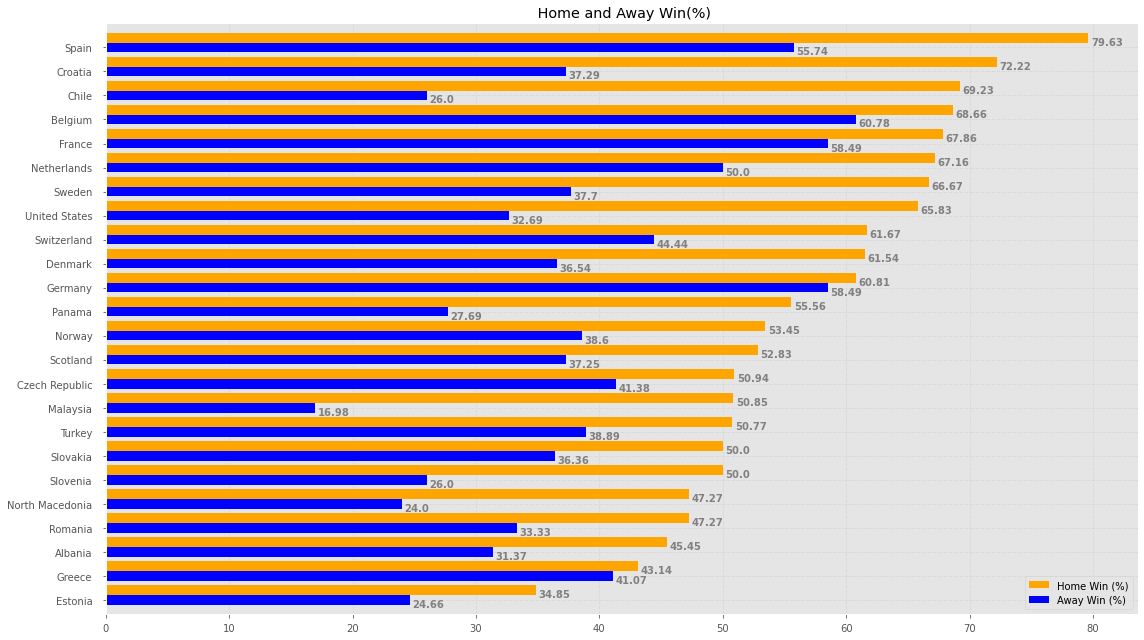

In [131]:
# Set the figure size
plt.rcParams["figure.figsize"] = [16, 9]
plt.rcParams["figure.autolayout"] = True

# Array for horizontal bar's position
ind = np.arange(len(final.Team))

# Bar's width
width = .4

fig, ax = plt.subplots()

# Horizontal bar plot
ax.barh(ind, final['home_win%'], width, color='orange', label='Home Win (%)')
ax.barh(ind + width, final['away_win%'], width, color='blue', label='Away Win (%)')

# Set Y-axis ticks and ticklabels
ax.set(yticks=ind + width, yticklabels=final.Team,
ylim=[width - 1, len(ind)])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.5,alpha = 0.2)



# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

# Legend at the upper right corner
ax.legend()

# Add Plot Title
ax.set_title(' Home and Away Win(%)' )

# Display the plot
plt.show()

In [132]:
teams = final[final['home_win%'] - final['away_win%'] <= 15]
teams

,Team,home_win%,away_win%
1,Belgium,68.656716,60.784314
7,France,67.857143,58.490566
8,Germany,60.810811,58.490566
13,Norway,53.448276,38.596491
4,Czech Republic,50.943396,41.379310
22,Turkey,50.769231,38.888889
17,Slovakia,50.000000,36.363636
15,Romania,47.272727,33.333333
0,Albania,45.454545,31.372549
9,Greece,43.137255,41.071429


In [133]:
teams = final[final['home_win%'] - final['away_win%'] > 15]
teams

,Team,home_win%,away_win%
19,Spain,79.629630,55.737705
3,Croatia,72.222222,37.288136
2,Chile,69.230769,26.000000
11,Netherlands,67.164179,50.000000
20,Sweden,66.666667,37.704918
23,United States,65.833333,32.692308
21,Switzerland,61.666667,44.444444
5,Denmark,61.538462,36.538462
14,Panama,55.555556,27.692308
16,Scotland,52.830189,37.254902
